# Case Study: Bike Share Navigation Speedy Success

### Author: Raquel Castromonte
Date Finished: February 2023

# Introduction

A company Cyclistic, a bike-share company in Chicago, wants to maximize number of annual membership. To best understand the customer base, we will study the behaviors of casual riders and annual members. From this, we will lead the marketing team with insights of the customers and influence casual members to become annual members. 

### Case Background Information

**Cyclistic** was founded in 2016 and since then they have:
- 5824 bicycles
- 692 docking stations 
- 4 types of bikes: two-wheeled bikes, reclining bikes, hand tricycles, and cargo bikes.

Riders Insights:
- majority of riders use traditional two-wheeled bikes
- 8% of riders use assistive options
- 30% of riders use bikes to commute to work every day

Bike System:
- bikes can be unlocked from one station and returned at another

Pricing Plans
- Casual Riders: single-ride passes or full-day passes
- Cyclistic Members: annual membership

Finance Analyst perspective:
- annual members are more profitable than casual riders
- **key growth**: maximizing the number of annual members


### Goal: Converting casual riders into annual members

### Guiding Questions
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to incluence casual riders to become members?

### Report
The report attached will include:
1. A clear statement of the business task 
2. A description of all data sources used 
3. Documentation of any cleaning or manipulation of data 
4. A summary of your analysis 
5. Supporting visualizations and key findings 
6. Your top three recommendations based on your analysis 

# Business Task

Cyclistic, a bike-share company based in Chicago, wants to convert casual riders to annual members. The bike-share programs offers four types of bikes, three payment plans, more than 5,800 bikes and 600 docking stations in the Chicago area. Annual members are customers who have an annual membership and casual members are customers who purchase a single pass of a full day pass. The marketing analytics team will provide the executive team with customer behavior insights, reasons for casual riders to become annual members, and recommendations for digital media influence.

# Data Source

For purposes of of this study, this public dataset comes was made available my Motivate International Inc. We will analyze the data of all 12 months of 2022. 


# Data Cleaning

In [1]:
import os
os.getcwd()
os.chdir("C:\\Users\\raquel\\Desktop\\BikeStudy")

In [2]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
#import data
Jan = pd.read_csv("202201-divvy-tripdata.csv")
Feb = pd.read_csv("202202-divvy-tripdata.csv")
Mar = pd.read_csv("202203-divvy-tripdata.csv")
Apr = pd.read_csv("202204-divvy-tripdata.csv")
May = pd.read_csv("202205-divvy-tripdata.csv")
Jun = pd.read_csv("202206-divvy-tripdata.csv")
Jul = pd.read_csv("202207-divvy-tripdata.csv")
Aug = pd.read_csv("202208-divvy-tripdata.csv")
Sep = pd.read_csv("202209-divvy-tripdata.csv")
Oct = pd.read_csv("202210-divvy-tripdata.csv")
Nov = pd.read_csv("202211-divvy-tripdata.csv")
Dec = pd.read_csv("202212-divvy-tripdata.csv")

In [4]:
#combine the datasets into one
data_2022 = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], axis = 0, ignore_index=True)
data_2022.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual


In [5]:
print(data_2022.member_casual.unique()) #two values
print(data_2022.rideable_type.unique()) #three values

['casual' 'member']
['electric_bike' 'classic_bike' 'docked_bike']


## Tasks:
1. Make a new column 'Time_Diff' with the time difference between the start and end time.
2. Seperate date and time (for started_at, ended_at, and time_diff).
3. Write a column with the day of the week the ride started. 
4. Make a column if start and end stations are the same.

### Task 1: Make new column with time difference

In [6]:
#convert to datetime values
data_2022["started_at"] = pd.to_datetime(data_2022.started_at) 
data_2022["ended_at"] = pd.to_datetime(data_2022.ended_at) 

#create new column with time difference
data_2022["time_diff"] = data_2022["ended_at"] - data_2022["started_at"]

### Task 2: Seperate Date and Time

In [7]:
#separate date and time 
data_2022["start_date"] = data_2022["started_at"].dt.date
data_2022["start_time"] = data_2022["started_at"].dt.time

data_2022["end_date"] = data_2022["ended_at"].dt.date
data_2022["end_time"] = data_2022["ended_at"].dt.time

data_2022["ride_length_days"] = data_2022["time_diff"].dt.days
data_2022["ride_length_seconds"] = data_2022["time_diff"].dt.seconds

In [8]:
#there are no trips less than 0 seconds
data_2022[data_2022.ride_length_seconds < 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds


In [9]:
#however, there are trips less than a day
data_2022[data_2022.ride_length_days < 0].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds
403591,2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.936688,-87.636829,41.936688,-87.636829,casual,-1 days +23:54:04,2022-03-05,11:00:57,2022-03-05,10:55:01,-1,86044
406768,7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936313,-87.652522,41.936253,-87.652662,casual,-1 days +23:59:53,2022-03-05,11:38:04,2022-03-05,11:37:57,-1,86393
1467055,0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,NaN,NaN,41.949069,-87.648499,41.950000,-87.650000,casual,-1 days +23:59:48,2022-05-30,11:06:29,2022-05-30,11:06:17,-1,86388
1635637,B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NaN,NaN,Kostner Ave & North Ave,519,41.900000,-87.740000,41.910000,-87.740000,casual,-1 days +21:49:58,2022-06-07,19:15:39,2022-06-07,17:05:37,-1,78598
1636060,072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.920000,-87.650000,41.920000,-87.650000,casual,-1 days +21:52:59,2022-06-07,19:14:46,2022-06-07,17:07:45,-1,78779


In [10]:
#we will delete these rows
drop_these = data_2022[data_2022.ride_length_days < 0].index

In [11]:
#we will delete this row
data_2022.drop(drop_these)
data_2022.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.0128,-87.665906,42.01256,-87.674367,casual,0 days 00:02:57,2022-01-13,11:59:47,2022-01-13,12:02:44,0,177


### Task 3: Day of the Week the ride started

In [12]:
# Convert using calender's day_name method
data_2022["weekday_start"] = data_2022["start_date"].apply(lambda x: datetime.datetime.strftime(x, '%A'))
data_2022.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds,weekday_start
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,...,-87.674367,casual,0 days 00:02:57,2022-01-13,11:59:47,2022-01-13,12:02:44,0,177,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,...,-87.674367,casual,0 days 00:04:21,2022-01-10,08:41:56,2022-01-10,08:46:17,0,261,Monday


### Task 4: Consider if start and end station are the same

In [13]:
#new column will show if the rider went back to return the bike at the same station, and which ones are not
#same station = 1
data_2022.loc[data_2022["start_station_id"] == data_2022["end_station_id"], 'same_station'] = int(1)

In [14]:
#different_station = 0
data_2022.loc[data_2022["start_station_id"] != data_2022["end_station_id"], 'same_station'] = int(0)

In [15]:
#check some rows with the same start and end station
data_2022[data_2022.same_station == 1].head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,member_casual,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds,weekday_start,same_station
15,7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.923931,-87.635825,...,member,0 days 00:00:32,2022-01-14,05:47:07,2022-01-14,05:47:39,0,32,Friday,1.0
21,1A185AF405E7B2DB,classic_bike,2022-01-13 12:47:10,2022-01-13 13:10:20,Sedgwick St & North Ave,TA1307000038,Sedgwick St & North Ave,TA1307000038,41.911386,-87.638677,...,member,0 days 00:23:10,2022-01-13,12:47:10,2022-01-13,13:10:20,0,1390,Thursday,1.0


## Data Analysis 

**Questions for Analysis**
1. Calculate the mean of ride_length 
2. Calculate the max ride_length
3. Calculate the mode of day_of_week

In [16]:
# mean ride length
print("The mean ride length in seconds is: ", round(data_2022.ride_length_seconds.mean()), "seconds, or ", round(data_2022.ride_length_seconds.mean())/60, "minutes")

The mean ride length in seconds is:  990 seconds, or  16.5 minutes


In [17]:
print("The max ride length in seconds is: ", data_2022.ride_length_seconds.max(), "seconds, or ", data_2022.ride_length_seconds.max()/60, "minutes")

The max ride length in seconds is:  86399 seconds, or  1439.9833333333333 minutes


In [18]:
import statistics
print("The most often riden start weekday is: ", statistics.mode(data_2022.weekday_start))

The most often riden start weekday is:  Saturday


In [19]:
ride_length = data_2022.groupby('member_casual').ride_length_seconds
print("Max ride length:", ride_length.max(), "\n")
print("Min ride length:", ride_length.min(), "\n")
print("Median ride length:", ride_length.median(), "\n")
print("Mean ride length:", ride_length.mean(), "\n")

Max ride length: member_casual
casual    86399
member    86399
Name: ride_length_seconds, dtype: int64 

Min ride length: member_casual
casual    0
member    0
Name: ride_length_seconds, dtype: int64 

Median ride length: member_casual
casual    780.0
member    530.0
Name: ride_length_seconds, dtype: float64 

Mean ride length: member_casual
casual    1343.193471
member     745.477786
Name: ride_length_seconds, dtype: float64 



**Insights**
- Casual riders take longer rides on average
- There is no difference in maximum or minimum ride length
- Saturday is the day most riders use a bike.

## Data Visualizations

1. Percent of Users who Do Overnight Trips
2. Mean Ride Length by Type of Rider by Weekday
3. Number of Rides by Membership Type in 2022
4. Number of Rides by Bike Type by Memership Status
5. Number of Active Users per Month in 2022
6. Length of Ride by Membership

### Visualization 1

Pie Graph: Percent of Users who Do Overnight Trips

In [20]:
# casual users are orange
# members are blue
color = ['orange','blue']

In [21]:
#which use is most likely to use the bikes overnight
overnight_users = data_2022[data_2022.ride_length_days > 0] 
data_pie = overnight_users.groupby(['member_casual']).count().ride_id
data_pie

member_casual
casual    4644
member     716
Name: ride_id, dtype: int64

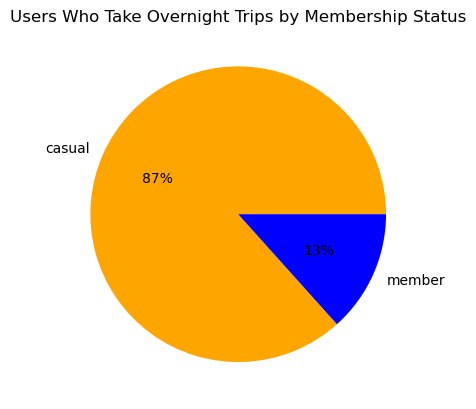

In [22]:
plt.pie(data_pie, labels = data_pie.index, autopct='%1.0f%%', colors = color)
plt.title("Users Who Take Overnight Trips by Membership Status")
plt.show()

In [23]:
#which use is most likely to use the bikes overnight
day_users = data_2022[data_2022.ride_length_days == 0] 
data_pie2 = day_users.groupby(['member_casual']).count().ride_id
data_pie2

member_casual
casual    2317333
member    3344924
Name: ride_id, dtype: int64

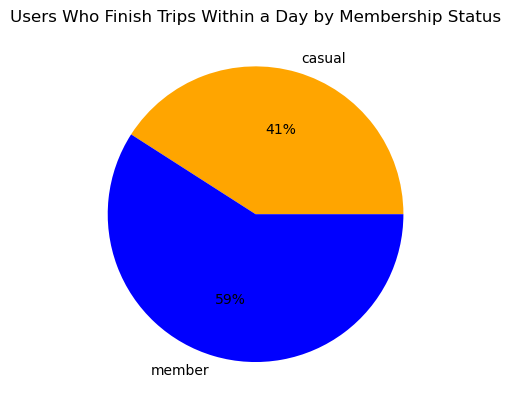

In [24]:
plt.pie(data_pie2, labels = data_pie.index, autopct='%1.0f%%', colors = color)
plt.title("Users Who Finish Trips Within a Day by Membership Status")
plt.show()

In [25]:
## subplot
onlymem = overnight_users[overnight_users.member_casual == "member"]
onlycasu = overnight_users[overnight_users.member_casual == "casual"]

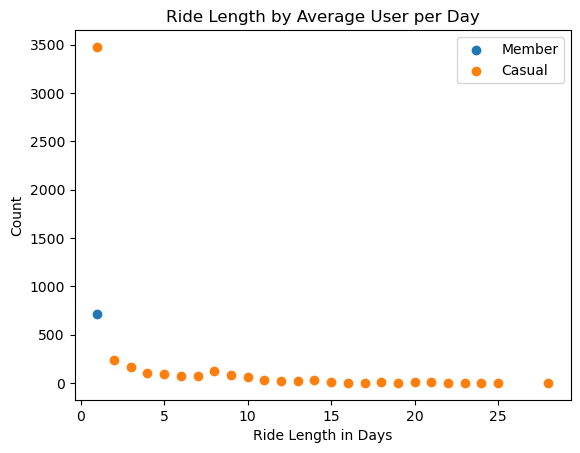

In [26]:
x ,y  = np.unique(onlymem.ride_length_days, return_counts = True)
z ,a  = np.unique(onlycasu.ride_length_days, return_counts = True)# counting occurrence of each loan
plt.scatter(x, y, label = "Member")
plt.scatter(z, a, label = "Casual")
plt.title("Ride Length by Average User per Day")
plt.xlabel("Ride Length in Days")
plt.ylabel("Count")
plt.legend()
plt.show()

**Insights**
- 87% of users who take overnight rides (ride starts in one day and end in another day) are casual users. 
- Members are more likely to take start and end a ride within a day. 
- Casual users take multiday rides.

### Visualization 2

Bar Graph: Mean Ride Length by Type of Rider by Weekday

In [27]:
group_member = data_2022.groupby(['member_casual', "weekday_start"]).mean()
fri = group_member.index[0][1]
mon = group_member.index[1][1]
sat = group_member.index[2][1]
sun = group_member.index[3][1]
thur = group_member.index[4][1]
tues = group_member.index[5][1]
wed = group_member.index[6][1]

In [28]:
viz1 = df = pd.DataFrame()
viz1["Index"] = [5, 1, 6, 0, 4, 2, 3, 12, 38, 13, 7, 11, 9, 10 ]
viz1["Weekday"] = [fri, mon, sat, sun, thur, tues, wed, fri, mon, sat, sun, thur, tues, wed]
viz1["Value"] = group_member.ride_length_seconds.values
viz1["Membership"] = ["Casual", "Casual", "Casual", "Casual", "Casual", "Casual", "Casual", "Membership", "Membership", "Membership", "Membership", "Membership", "Membership", "Membership"]
viz1 = viz1.sort_values (by = ["Index"], axis=0, ascending=True)

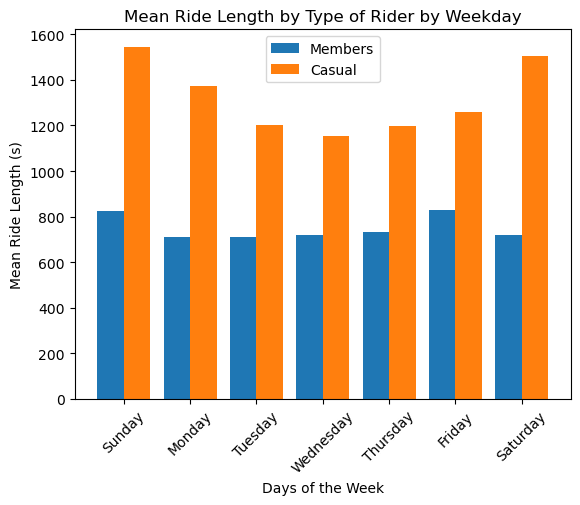

In [29]:
X = viz1.Weekday[:7]
casual = viz1.Value[:7]
member = viz1.Value[7:]

X_axis = np.arange(len(X))
  
plt.bar(X_axis-0.2, member, 0.4, label = 'Members')
plt.bar(X_axis+0.2, casual, 0.4, label = 'Casual')
plt.xticks(X_axis, X)
plt.xlabel("Days of the Week")
plt.ylabel("Mean Ride Length (s)")
plt.title("Mean Ride Length by Type of Rider by Weekday")
plt.xticks(rotation = 45)
plt.legend()
plt.show()

**Insights**
- Casual users ride the bikes for longer periods of time compared to members.
- Members have a uniform use of the bike throughout the week.
- Casual users ride more frequently in the weekends and Monday.

### Visualization 3

Bar Graph: The number of rides by rider membership

In [30]:
numofrider = data_2022.groupby('member_casual').count()
numofrider

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,time_diff,start_date,start_time,end_date,end_time,ride_length_days,ride_length_seconds,weekday_start,same_station
member_casual,,,,,,,,,,,,,,,,,,,,,
casual,2322032,2322032,2322032,2322032,1974625,1974625,1913141,1913141,2322032,2322032,...,2316863,2322032,2322032,2322032,2322032,2322032,2322032,2322032,2322032,2322032
member,3345685,3345685,3345685,3345685,2860028,2860028,2861834,2861834,3345685,3345685,...,3344996,3345685,3345685,3345685,3345685,3345685,3345685,3345685,3345685,3345685


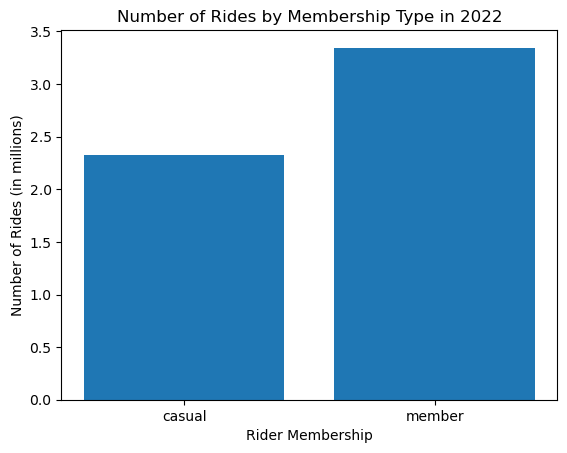

In [31]:
plt.bar([numofrider.ride_id.index[0], numofrider.ride_id.index[1]],  numofrider.ride_id.values/1000000)
plt.xlabel("Rider Membership")
plt.ylabel("Number of Rides (in millions)")
plt.title("Number of Rides by Membership Type in 2022")
plt.show()

In [32]:
cas_rides = numofrider.ride_id.values[0]/(numofrider.ride_id.values[0]+numofrider.ride_id.values[1]) *100 #casual users
mems_rides = numofrider.ride_id.values[1]/(numofrider.ride_id.values[0]+numofrider.ride_id.values[1]) *100 #members
diff_in_rides = (mems_rides - cas_rides) /cas_rides * 100
print("Members ride", round(diff_in_rides), "% more than casual riders")

Members ride 44 % more than casual riders


**Insights**
- Members take more rides in a year than casual users.

### Visualization 4
Bar Graph: Which members use which types of bikes

In [33]:
viz3 = data_2022.groupby(['member_casual', "rideable_type"]).count()
viz3

ride_id  started_at  ended_at  \
member_casual rideable_type                                  
casual        classic_bike    891459      891459    891459   
              docked_bike     177474      177474    177474   
              electric_bike  1253099     1253099   1253099   
member        classic_bike   1709755     1709755   1709755   
              electric_bike  1635930     1635930   1635930   

                             start_station_name  start_station_id  \
member_casual rideable_type                                         
casual        classic_bike               891459            891459   
              docked_bike                177474            177474   
              electric_bike              905692            905692   
member        classic_bike              1709755           1709755   
              electric_bike             1150273           1150273   

                             end_station_name  end_station_id  start_lat  \
member_casual rideable_type                                                
casual        classic_bike             888780          888780     891459   
              docked_bike              174858          174858     177474   
              electric_bike            849503          849503    1253099   
member        classic_bike            1708646         1708646    1709755   
              electric_bike           1153188         1153188    1635930   

                             start_lng  end_lat  end_lng  time_diff  \
member_casual rideable_type                                           
casual        classic_bike      891459   888906   888906     891459   
              docked_bike       177474   174858   174858     177474   
              electric_bike    1253099  1253099  1253099    1253099   
member        classic_bike     1709755  1709066  1709066    1709755   
              electric_bike    1635930  1635930  1635930    1635930   

                             start_date  start_time  end_date  end_time  \
member_casual rideable_type                                               
casual        classic_bike       891459      891459    891459    891459   
              docked_bike        177474      177474    177474    177474   
              electric_bike     1253099     1253099   1253099   1253099   
member        classic_bike      1709755     1709755   1709755   1709755   
              electric_bike     1635930     1635930   1635930   1635930   

                             ride_length_days  ride_length_seconds  \
member_casual rideable_type                                          
casual        classic_bike             891459               891459   
              docked_bike              177474               177474   
              electric_bike           1253099              1253099   
member        classic_bike            1709755              1709755   
              electric_bike           1635930              1635930   

                             weekday_start  same_station  
member_casual rideable_type                               
casual        classic_bike          891459        891459  
              docked_bike           177474        177474  
              electric_bike        1253099       1253099  
member        classic_bike         1709755       1709755  
              electric_bike        1635930       1635930

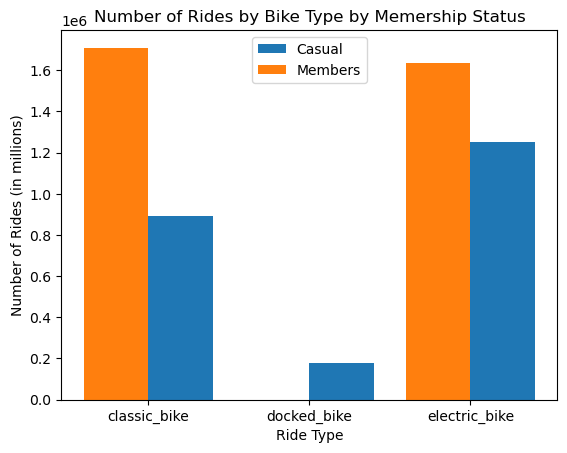

In [34]:
X = [viz3.ride_id.index[0][1], viz3.ride_id.index[1][1], viz3.ride_id.index[2][1]]
casual = viz3.ride_id.values[:3]
member = [viz3.ride_id.values[3] , 0, viz3.ride_id.values[4]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis+0.2, casual, 0.4, label = 'Casual')
plt.bar(X_axis-0.2, member, 0.4, label = 'Members')
plt.xticks(X_axis, X)
plt.xlabel("Ride Type")
plt.ylabel("Number of Rides (in millions)")
plt.title("Number of Rides by Bike Type by Memership Status")
plt.legend()
plt.show()

**Insights** 
- Casual riders use all three bike types
- Members use the classic bike or electic bike, they do not use docked bikes.
- Members use ride the classic bikes and electic bikes a lot more than casual users.

### Visualization 5
Line Graph: Number of active members per month

In [35]:
#add a month column for this visualization
data_2022["month"] = data_2022.started_at.dt.month

In [36]:
viz4 = data_2022.groupby(['member_casual', "month"]).count()
viz4

ride_id  rideable_type  started_at  ended_at  \
member_casual month                                                 
casual        1        18520          18520       18520     18520   
              2        21416          21416       21416     21416   
              3        89882          89882       89882     89882   
              4       126417         126417      126417    126417   
              5       280415         280415      280415    280415   
              6       369051         369051      369051    369051   
              7       406055         406055      406055    406055   
              8       358924         358924      358924    358924   
              9       296697         296697      296697    296697   
              10      208989         208989      208989    208989   
              11      100772         100772      100772    100772   
              12       44894          44894       44894     44894   
member        1        85250          85250       85250     85250   
              2        94193          94193       94193     94193   
              3       194160         194160      194160    194160   
              4       244832         244832      244832    244832   
              5       354443         354443      354443    354443   
              6       400153         400153      400153    400153   
              7       417433         417433      417433    417433   
              8       427008         427008      427008    427008   
              9       404642         404642      404642    404642   
              10      349696         349696      349696    349696   
              11      236963         236963      236963    236963   
              12      136912         136912      136912    136912   

                     start_station_name  start_station_id  end_station_name  \
member_casual month                                                           
casual        1                   14626             14626             13808   
              2                   17362             17362             16409   
              3                   75369             75369             72274   
              4                  103456            103456             99327   
              5                  243133            243133            235804   
              6                  322197            322197            314062   
              7                  349410            349410            338885   
              8                  305112            305112            295891   
              9                  250425            250425            242702   
              10                 173186            173186            167487   
              11                  83792             83792             81264   
              12                  36557             36557             35228   
member        1                   72884             72884             72035   
              2                   79667             79667             78845   
              3                  161427            161427            160611   
              4                  196906            196906            196634   
              5                  305021            305021            305883   
              6                  354063            354063            354990   
              7                  362047            362047            363652   
              8                  368783            368783            369519   
              9                  347134            347134            347452   
              10                 294144            294144            294581   
              11                 201986            201986            202212   
              12                 115966            115966            115420   

                     end_station_id  start_lat  start_lng  ...  end_lng  \
member_casual month                                        ...            
casual        1      

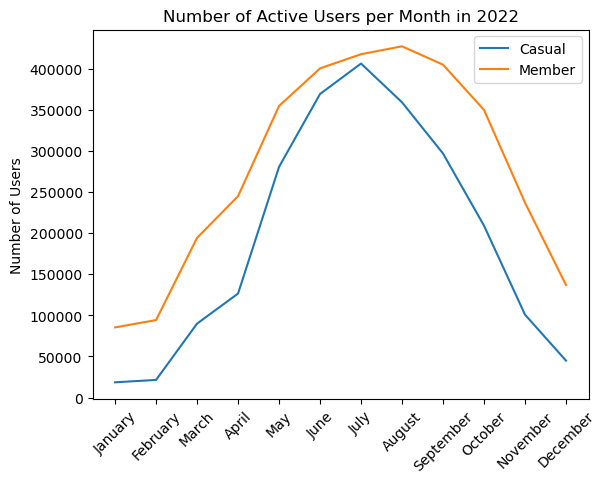

In [37]:
X = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
casual = viz4.ride_id.values[:12]
member = viz4.ride_id.values[12:]

plt.plot(X, casual, label = 'Casual')
plt.plot(X, member, label = 'Member')
plt.xticks(rotation = 45)
plt.title("Number of Active Users per Month in 2022")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**Insights**
- There is a greater difference between number of active users based on membership in January, February, November, and December (the colder month).
- There is a less gap between the number of active users in the warmer months (June, July, August)
- Members still use the bike share program more frequent than casual users in all months.

### Visualization 6
Box Plot: How long are the rides of members and non-members?

In [38]:
membersonly = data_2022[data_2022.member_casual == "member"]
casualonly = data_2022[data_2022.member_casual == "casual"]

In [39]:
hey = casualonly.ride_length_seconds.values/60
yo = np.full(1023653,np.nan)
heyyo = np.append(hey, yo)

viz5 = pd.DataFrame()
viz5["Members"] = membersonly.ride_length_seconds.values/60
viz5["Casual"] = heyyo

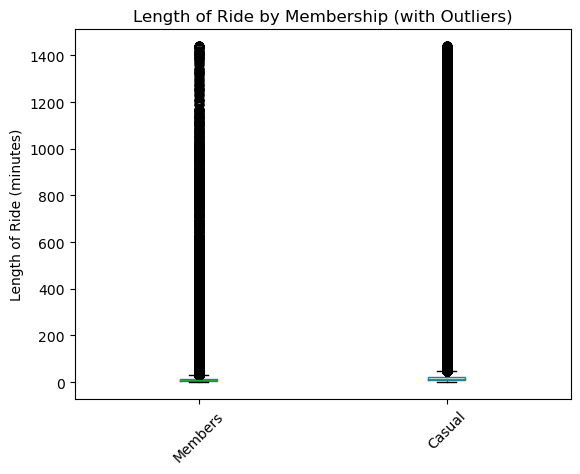

In [40]:
boxplot = viz5.boxplot(grid=False, rot=45, showfliers=True)
plt.title("Length of Ride by Membership (with Outliers)")
plt.ylabel("Length of Ride (minutes)")
plt.show()

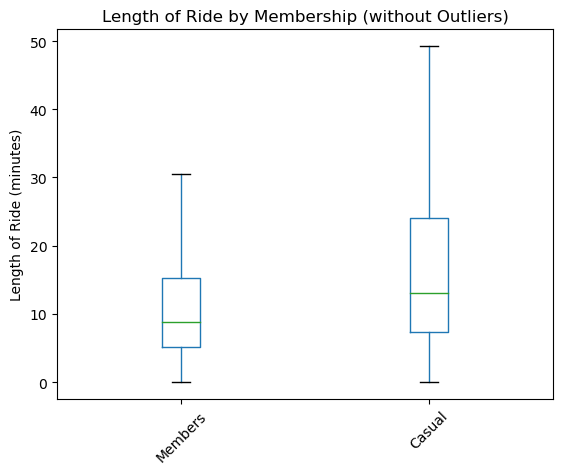

In [41]:
boxplot = viz5.boxplot(grid=False, rot=45, showfliers=False)
plt.title("Length of Ride by Membership (without Outliers)")
plt.ylabel("Length of Ride (minutes)")
plt.show()

**Insights**
- The average casual user take longer rides than members.
- Casual users in the 75th percentile (the top end of the whisker) about 20 minutes more than the 75th percentile of members.
- There is no difference between the lower 25 percent of each user option.

# Act

From my analysis, we have learned that members continuously use the bike share program year round. They use the bikes more frequently than casual users. 

We observe the behaviors of casual users, and they are more likely to use the bike share program in warmer months and on the weekend. Additionally, casual users take longer rides on average and they are more likely to use the rides for overnight trips.

From this we can assume that the users with membership use the bikes on a regular basis. Meanwhile, the casual user does not have a scheduled routine that involves a bike. Yet, casual users would look toward a annual membership if it is cost-effective for them. There may be several reasons as to why casual members start a bike ride one day and end the ride weeks later. Could this be because people think they can continue a ride for more than a day? Or is it because they are not close to a bike station? We would have to ask the company for more information.

My recommendations for the executive team are:
- to market the bike share program as a vacation or leisure activity. For example. advertisements could encourage hikers to obtain an annual membership since "adventure doesn't stop with the cold" or "Save the environment, and save with our annual membership program" 
- A promotion for users who convert to an annual membership for a limited time (summertime when activity is high or wintertime when activity is going to pick up for the warmer weather).
- Advertise to Chicago locals who will most likely take the annual membership compared to seasonal visitors who would use the single or say pass.